# Tutorial 3: Interaction cutoffs and energy nonconservation

## Physics 7810, Spring 2020

## T3.1 - Truncation effects for interacting particles in a central force potential

In Tutorial 2, you wrote an MD simulation program for $N$ interacting particles in a central force potential. This simulation code had no interaction cutoff, so the cost of computing pair interactions was $O(N^2)$.

In this tutorial, we'll introduce interaction cutoffs, a step toward achieving $O(N^2)$ computational complexity, and we'll quantify the effects of pair potential truncation on energy conservation.

Modify your simulation code to introduce an interaction cutoff distance $r_c$, so that the pair interaction potential now has the form:

$$
u_{\rm int}(r_{ij}) = \left\{
\begin{array}{ll}
a r_{ij}^{-k}, & r_{ij} < r_c \\
0, & r_{ij} \geq r_c
\end{array}
\right..
$$

For this exercise, take $k = 6$ and assume that $a$ is positive (repulsive $r^{-6}$ pair interaction). Take the central force potential to be harmonic $n = 2$.

First, with no trunction of the pair potential, adjust the integration timestep and total kinetic energy so that very good energy conservation is achieved over long simulation times (this may require a judicious choice of initial conditions). Plot the total energy $E$ as a function of $t$ and measure the relative root-mean-squared (rms) fluctuation in total energy over the course of a long simulation, where the relative rms fluctuation in energy is defined as

$$
\frac{\langle \delta E^2 \rangle^{1/2}}{\langle E \rangle} = \frac{\langle (E - \langle E \rangle)^2 \rangle^{1/2}}{\langle E \rangle},
$$

and where the angle brackets denote a time average.

Recall that

$$
\langle \delta E^2 \rangle = \langle (E - \langle E \rangle)^2 \rangle = \langle E^2 - 2 E \langle E \rangle + \langle E \rangle^2 \rangle
= \langle E^2 \rangle - \langle E \rangle^2
$$

Now repeat this simulation for various values of $r_c$. Plot $E$ as a function of $t$ and measure $\langle \delta E^2 \rangle^{1/2} / \langle E \rangle$ for each value of $r_c$. What impact does potential truncation have on energy conservation? Does imposing an interaction cutoff lead to long-term energy drift?

In [29]:
import sys
sys.path.insert(1, '../')  # so the system can locate the library folder
from CompPhysLib.MD_NVE import *

def quantify_cutoff(r_c):
    mdp = MDParameters('tutorial_02.yml')
    mdp.r_c = r_c
    MD = MolecularDynamics('tutorial_02.yml')
    MD.verlet_integration(MD.velocities, MD.coords)
    MDA = MDAnalysis('tutorial_02.yml', 'MD_traj.yml')
    MDA.plot_2d(MDA.E_total, 'Total Energy', 'J')
    
    E_avg = np.mean(MDA.E_total)
    E2_avg = np.mean(np.power(MDA.E_total, 2))
    RMSF = np.sqrt((E2_avg - E_avg ** 2)) / E_avg
    MDA.plot_xy_traj()
    print('RMSF: %s' % RMSF)

RMSF: 8.842631361037165e-05


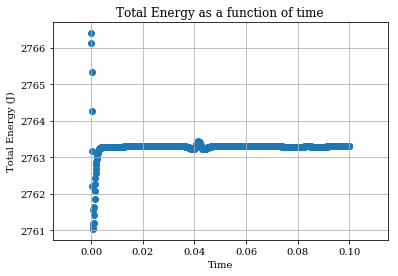

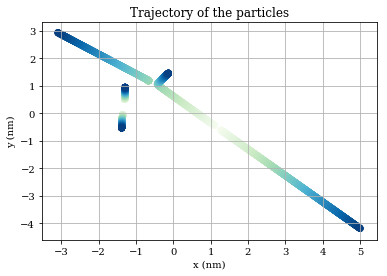

In [33]:
quantify_cutoff(0.2)

RMSF: 0.00017472390612903368


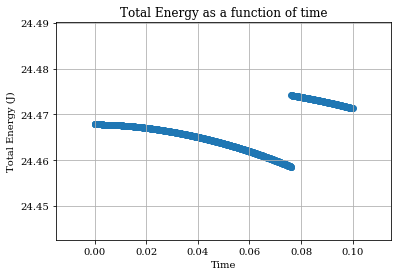

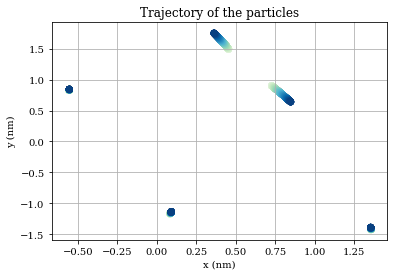

In [34]:
quantify_cutoff(0.01)